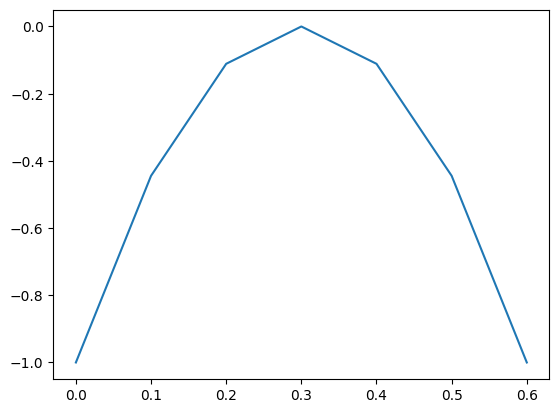

In [9]:
import matplotlib.pyplot as plt 

def reward_funct(curr_fill_level, target_fill_level):
    return -((curr_fill_level / target_fill_level - 1)**2)

target_fill_level = 0.3
rewards = [reward_funct(i, target_fill_level) for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]]
plt.plot([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], rewards)

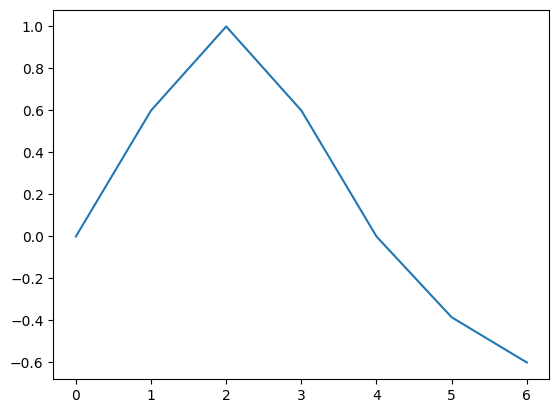

In [10]:
import matplotlib.pyplot as plt 

def reward_funct(curr_fill_level, target_fill_level):
    error = (curr_fill_level - target_fill_level) / target_fill_level
    return 2 / (1 + abs(error)**2) - 1

target_fill_level = 0.2
rewards = [reward_funct(i, target_fill_level) for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]]
plt.plot(rewards)

In [ ]:
from  jax.nn import sigmoid
import jax.numpy as jnp

pt_cup_wgt = 1.
pt_spill_wgt = -1.
pt_other_wgt = 1.
action_cost = .1
jug_resting_wgt = 0

def _get_particles_in_cup_smooth(n_particles, alpha = .006):
        #particles are in frame of ref of cup. simple test to check if particles in the boundingbox of cup
        x_in_range = sigmoid(alpha*(n_particles))
        y_in_range = sigmoid(alpha*(n_particles))
        z_in_range = sigmoid(alpha*(n_particles))

        comb = jnp.mean(x_in_range * y_in_range * z_in_range) + 1e-6
        return comb


def _get_particles_on_floor_smooth(n_particles, alpha=0.001):
        return jnp.mean(sigmoid(alpha*(n_particles))) + 1e-6


def _compute_reward(n_particles_cup, n_particles_spilled, jug_pose, action):
        """
        Compute the reward for a given transition.
        Args:
            particles: Current particle positions.
            jug_pose: Current jug pose.
            action: Action taken.
        Returns:
            reward: Reward for the transition.
        """
        cost_cup = pt_cup_wgt * _get_particles_in_cup_smooth(n_particles_cup)
        cost_spill = pt_spill_wgt * _get_particles_on_floor_smooth(n_particles_spilled)
        reward = cost_cup + cost_spill + action_cost * jnp.mean(action**2) + jug_resting_wgt * jnp.mean(jug_pose[3]**2)
        return reward

pose = jnp.array([0,0,0,0,0,0])
action = jnp.array([0,0,0,-0.01,0,0])

n_particles_cup = jnp.arange(0, 1000)
n_particles_spilled = jnp.arange(0, 1000)#jnp.zeros_like(n_particles_cup)


rewards = []
for n_cup, n_spill in zip(n_particles_cup, n_particles_spilled):
        pose += action
        r = _compute_reward(n_cup, n_spill, pose, action)
        rewards.append(r)

import matplotlib.pyplot as plt
plt.plot(rewards)
plt.show()

17.614491630345583


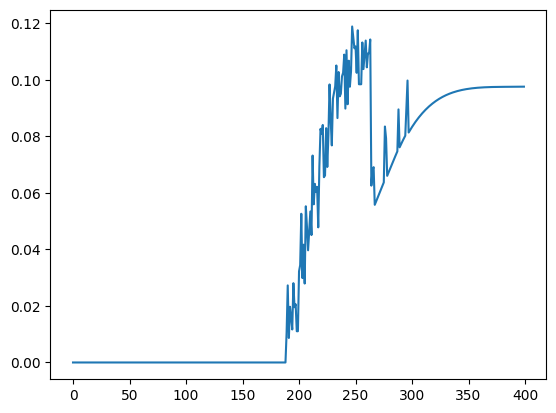

In [13]:
import numpy as np

saved_rewards = np.load(f"/home/carola/masterthesis/pouring_env/learning_to_simulate_pouring/output/rl/test5/saved_rewards.npz")

import matplotlib.pyplot as plt
plt.plot(saved_rewards['arr_0'])
print(np.sum(saved_rewards['arr_0']))

23.148788686376065


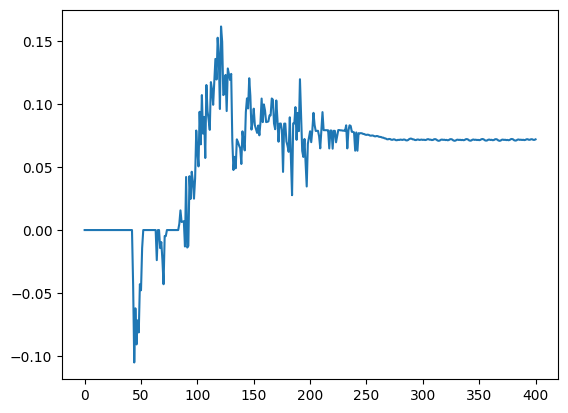

In [5]:
import numpy as np

episode_id = 1
saved_rewards = np.load(f"/home/carola/masterthesis/cleanrl/cleanrl/saved_rewards/PouringEnv-v0__td3_continuous_action_jax__42__1750619475-eval/episodes_{episode_id}.npz")

import matplotlib.pyplot as plt
plt.plot(saved_rewards['arr_0'])
print(np.sum(saved_rewards['arr_0']))

25.982881216332316


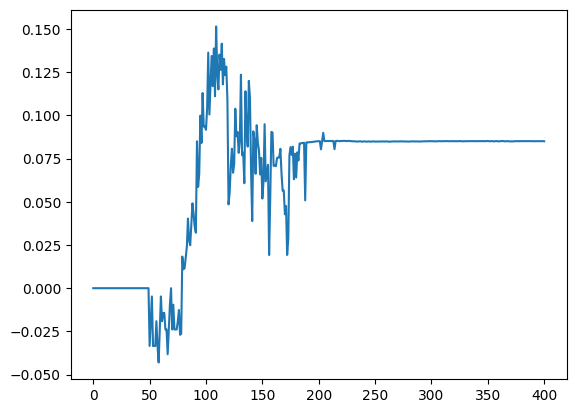

In [12]:
import numpy as np

episode_id = 1
saved_rewards = np.load(f"/home/carola/masterthesis/cleanrl/cleanrl/saved_rewards/PouringEnv-v0__td3_continuous_action_jax__42__1749473745-eval/episodes_{episode_id}.npz")

import matplotlib.pyplot as plt
plt.plot(saved_rewards['arr_0'])
print(np.sum(saved_rewards['arr_0']))

0 :  0.42024833
1 :  0.3992359
2 :  0.417383
3 :  0.43266475
4 :  0.41165233
5 :  0.45176694
6 :  0.40592167
7 :  0.4364852
8 :  0.41833812
9 :  0.41356257
average:  0.42072588


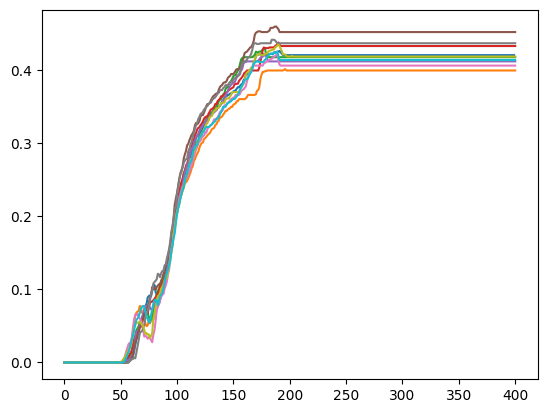

In [1]:
import numpy as np
import matplotlib.pyplot as plt

avg_filllevels = []
for episode_id in range(0, 10):
    saved_rewards = np.load(f"/home/carola/masterthesis/cleanrl/cleanrl/saved_rewards/PouringEnv-v0__td3_continuous_action_jax__42__1750841250-eval/episodes_{episode_id}_filllevels.npz")

    plt.plot(saved_rewards['arr_0'])
    print(episode_id, ': ', saved_rewards['arr_0'][-1])
    avg_filllevels.append(saved_rewards['arr_0'][-1])

print('average: ', np.mean(avg_filllevels))

0.3610315
0.38586438
0.3705826
0.34670487
0.3686724
0.34288442
0.37249285
0.3600764
0.36485195
0.38108882
average:  0.36542502


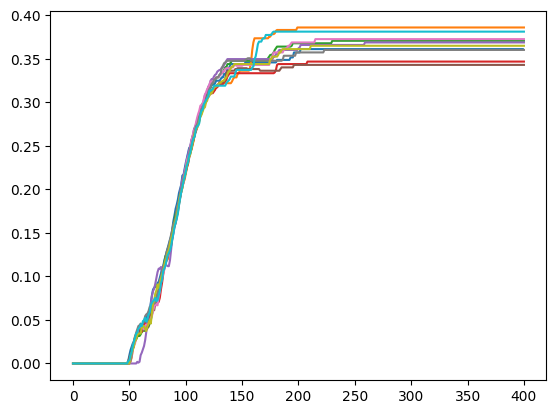

In [5]:
import numpy as np
import matplotlib.pyplot as plt

avg_filllevels = []

for episode_id in range(0, 10):
    saved_rewards = np.load(f"/home/carola/masterthesis/saved_rewards/1749329768_eval/episodes_{episode_id}_filllevels.npz")

    plt.plot(saved_rewards['arr_0'])
    print(saved_rewards['arr_0'][-1])
    avg_filllevels.append(saved_rewards['arr_0'][-1])

print('average: ', np.mean(avg_filllevels))


In [ ]:
import numpy as np

episode_id = 2
saved_rewards = np.load(f"/home/carola/masterthesis/saved_rewards/1748383140_eval/episodes_{episode_id}.npz")

import matplotlib.pyplot as plt
plt.plot(saved_rewards['arr_0'])
print(np.sum(saved_rewards['arr_0']))

1.0
0.0


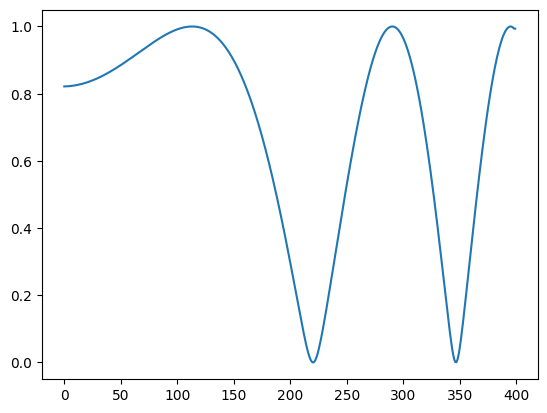

In [5]:
saved_distances = np.load(f"/home/carola/masterthesis/pouring_env/learning_to_simulate_pouring/output/rl/test5/saved_states.npz")

import matplotlib.pyplot as plt
plt.plot(saved_distances['arr_0'])
print(np.max(saved_distances['arr_0']))
print(np.min(saved_distances['arr_0']))

0.99668014
-0.99668014


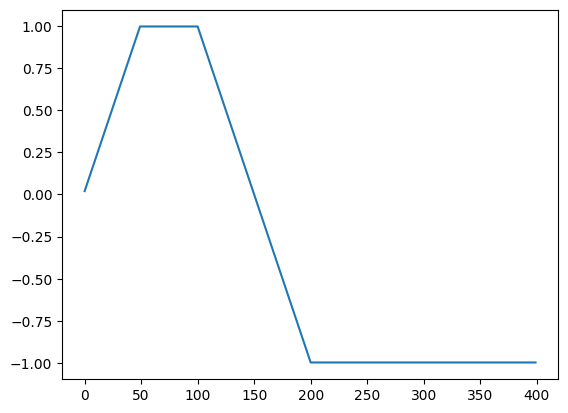

In [27]:
import numpy as np
saved_velocities = np.load(f"/home/carola/masterthesis/pouring_env/learning_to_simulate_pouring/output/rl/test5/saved_velocities.npz")

import matplotlib.pyplot as plt
dim = 3
plt.plot(saved_velocities['arr_0'][:, dim])
print(np.max(saved_velocities['arr_0'][:, dim]))
print(np.min(saved_velocities['arr_0'][:, dim]))

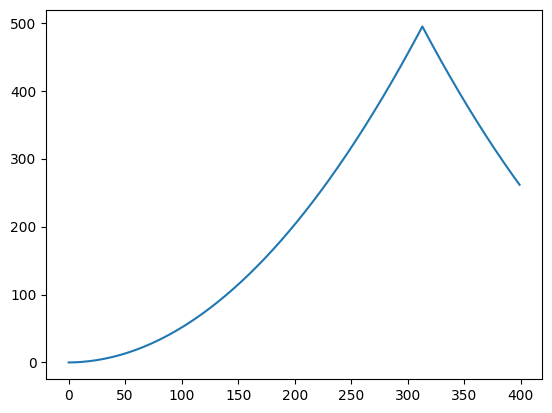

In [36]:
import numpy as np

saved_states = np.load(f"/home/carola/masterthesis/pouring_env/learning_to_simulate_pouring/output/rl/test4/saved_states.npz")

import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
rot_mats = saved_states['arr_0'][:, -9:12].reshape(-1, 3, 3)  # shape (N, 3, 3)
rots = R.from_matrix(rot_mats)
euler = rots.as_euler('xyz', degrees=True)
plt.plot(np.unwrap(np.radians(euler[:, 0])))

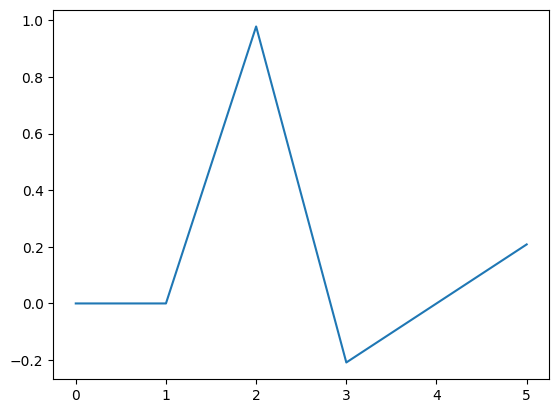

In [45]:
plt.plot(saved_states['arr_0'][:,-7:-1][5])

In [49]:
25e3

25000.0